## RQ5: Does a long distance correlate with the duration of the trip on average? 

The next step is plotting the dependence between distance and duration of the trip. Before that, we need some exploratory analysis to clean our data. Then, we will show the distributions for both features and compute the Pearson Coefficient.

We import Python libraries and functions defined in another file that we will need for our analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import RQ5_functions
import warnings; warnings.simplefilter('ignore')

During these analysis the most interesting columns are:
* **Trip_distance** - The elapsed trip distance in miles reported by the taximeter
* **tpep_pickup_datetime** - The date and time when the meter was engaged.
* **tpep_dropoff_datetime** - The date and time when the meter was disengaged. 

### Preparing and filtering data for each month
----------

We calculated the duration of all taxi journeys each month as in RQ3 question above. The information about the trip distance is located in column 'trip_distance'. The function **get_trip_duration_and_distance_all_months** calculates and selects these data and returns as a data frame.

In [5]:
# trip_duration_and_distance_df = pd.read_csv("D:/trip_duration_and_distance.csv")
trip_duration_and_distance_df = RQ5_functions.get_trip_duration_and_distance_all_months()

Let's look at the basic statistics describing our data. In particular, we turned our attention to the percentages that give information on how the data is distributed. We noticed that the 99th percentile is much smaller than the maximum value. This suggests that there are outliers in the data collected. For a more accurate analysis, we will now filter the most important data for both trip duration and trip_distance columns.

In [11]:
trip_duration_and_distance_df.describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

,duration,trip_distance
count,5.392574e+07,5.392574e+07
mean,1.604486e+01,2.900861e+00
std,1.455252e+03,2.607412e+01
min,-1.066961e+07,0.000000e+00
50%,1.000000e+01,1.600000e+00
60%,1.300000e+01,2.000000e+00
70%,1.600000e+01,2.560000e+00
80%,2.000000e+01,3.600000e+00
90%,2.700000e+01,6.710000e+00
95%,3.600000e+01,1.073000e+01


**The trip duration: **
* Another important information that we obtained from the above analysis is the minimal trip duration. Of course, in reality, it is not possible to duration was negative. Similarly to the analysis from RQ3, it makes sense to not analyze the data that lasted 0 minutes. 
* According to the previous analysis [notebook for RQ3], we chose 100 minutes as the upper bound for the trip duration.

**The trip distance:**
* In the case of trip distance, the first reasonable assumption is that it cannot be equal to 0. 
* Morover, the 99th percentile trip_distance is about 19 miles, and the maximum is almost 190,000.
**What should be the upper bound for our data?** To be more certain, we check what is the percentile for a few scores.

In [16]:
print("Trip distance less than...")
for score in range(10, 100, 10):
    print("{0} miles -> {1:.3f} percentile".format(score, stats.percentileofscore(trip_duration_and_distance_df.trip_distance, score)))

Trip distance less than...
10 miles -> 94.341 percentile
20 miles -> 99.383 percentile
30 miles -> 99.961 percentile
40 miles -> 99.990 percentile
50 miles -> 99.996 percentile
60 miles -> 99.998 percentile
70 miles -> 99.999 percentile
80 miles -> 99.999 percentile
90 miles -> 100.000 percentile


* It seems wise to select trips where the distance is less than 30 miles, because after this filtration our data will still account for 99.96% of all data.

In [4]:
# Filtering according to our assumptions above
filtered_trip_duration_and_distance_df = trip_duration_and_distance_df[(trip_duration_and_distance_df.duration.between(0,100, inclusive=False))\
                                                                       & (trip_duration_and_distance_df.trip_distance.between(0, 30, inclusive=False))]

---------------
## Visualization of data

We plot the Cumulative Distribution Function:

Text(0.5,1,'The trip duration Cumulative DF')

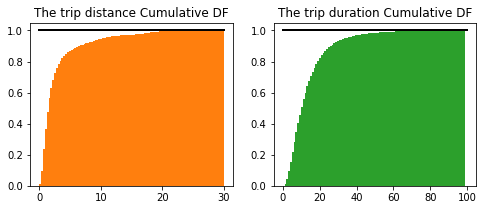

In [42]:
RQ5_functions.plot_cdf(filtered_trip_duration_and_distance_df)

In both cases, CDF quickly increases to 1. We also can see that our sample covers a majority of data. 

Then, we plot the density histograms for both 'trip_distance' and 'duration' columns:

Text(0.5,1,'The trip duration distribution')

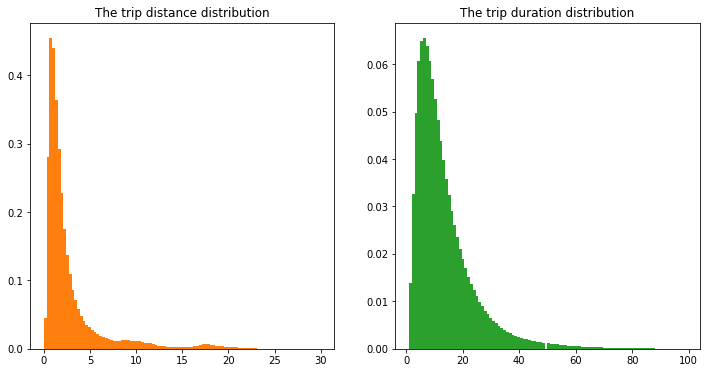

In [7]:
RQ5_functions.plot_density(filtered_trip_duration_and_distance_df)

* Both plots are the right-skewed distributions.They are not normally distributed.
* Most of the trip distances is about 2 miles. For the large distances, the decrease is very fast.

---------------

### Correlation between distance and duration of the trip.


* **Pearson** is the most widely used correlation coefficient. Pearson correlation measures the linear association between continuous variables. In other words, this coefficient quantifies the degree to which a relationship between two variables can be described by a line. [1]
* Pearson’s correlation requires for each dataset **to be normally distributed** [3]

__To have the normally distributed data, we calculated the logaritmic values for both datasets.__

The distributions are shown on marginal axes of the plot below.

In [5]:
# Adding Columns with the logaritmic values for the distance and duration
filtered_trip_duration_and_distance_df["log_trip_duration"] = np.log(filtered_trip_duration_and_distance_df.duration)
filtered_trip_duration_and_distance_df["log_trip_distance"] = np.log(filtered_trip_duration_and_distance_df.trip_distance)

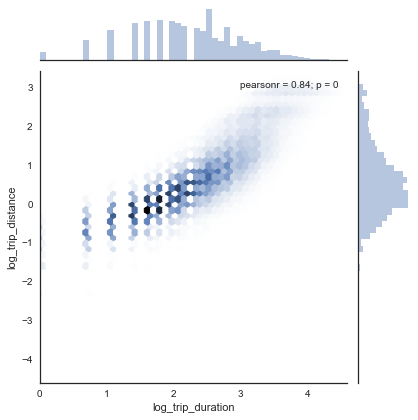

In [12]:
with sns.axes_style('white'):
    sns.jointplot("log_trip_duration", "log_trip_distance", sample_df, kind='hex')

The seaborn function automatically calculates the Pearson's Coefficient and the p-value.


* Function **scipy.stats.pearsonr(x, y)** -- Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

In [9]:
stats.pearsonr(filtered_trip_duration_and_distance_df["log_trip_duration"],filtered_trip_duration_and_distance_df["log_trip_distance"])

(0.8436771271402189, 0.0)

* The Pearson Correlation is about 0.84. There is **quite a strong, positive linear relationship** between the length and duration of the trip. We noticed the kind of linearity on the plot, as well.
* P-value is 0.0 and less than 0.05, so it means that the correlation is **statistically significant**

----------

Sources:
[1] https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials
[2] https://pandas.pydata.org
[3] https://docs.scipy.org/
[4] https://matplotlib.org